In [1]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
# stat_graph_df = DataLoader.load_csv_stat_graph(False)
# stat_trans_graph_df = DataLoader.load_csv_stat_graph(True)

Number of apps: 
381
Total entries:
1987
Number of apps: 
381
Total entries:
1987
Total covered methods:
4229784
Everything is good!
Total entries:
1987


Coverage_report

In [34]:
test_graph_df.head()

,source,target,action,widget_id,widget,strategy,app
0,com.advent.chat.MainActivity,NaN,NaN,NaN,NaN,systematic,com.advent.chat
1,com.advent.chat.MainActivity,NaN,NaN,NaN,NaN,random,com.advent.chat
2,com.smsrobot.periodlite.SetupActivity,com.smsrobot.periodlite.StartActivity,I Agree,2.131625e+09,android.support.v7.widget.AppCompatButton,systematic,com.smsrobot.periodlite
3,com.smsrobot.periodlite.StartActivity,NaN,NaN,NaN,NaN,random,com.smsrobot.periodlite
4,com.qisi.plugin.activities.MainActivity,net.afpro.lockerbase.LockActivity,back,NaN,NaN,systematic,com.ikeyboard.theme.RoseSkull


In [35]:
test_graph_df.groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>5</td>
      <td>5</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.love_photo_frames_hd</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [36]:
valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.target != "com.google.android.gms.ads.AdActivity")]
valid_test_graph.groupby(["strategy", "app"]).count().head()
# valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.love_photo_frames_hd</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [38]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.advent.chat,com.advent.chat.AcitivityNotification,AcitivityNotification (): void,systematic,method,0,0,1,com.advent.chat
1,com.advent.chat,com.advent.chat.AcitivityNotification,AcitivityNotification (): void,systematic,block,0,0,3,com.advent.chat
2,com.advent.chat,com.advent.chat.AcitivityNotification,onClick (View): void,systematic,method,0,0,1,com.advent.chat
3,com.advent.chat,com.advent.chat.AcitivityNotification,onClick (View): void,systematic,block,0,0,19,com.advent.chat
4,com.advent.chat,com.advent.chat.AcitivityNotification,onCreate (Bundle): void,systematic,method,0,0,1,com.advent.chat


In [40]:
coverage_per_app = coverage_df[(coverage_df.coverage_type == "method")].groupby(["strategy", "app"]).apply(
    lambda x: x.coverage_percentage.sum() / x.coverage_percentage.count())


In [41]:
valid_test_graph[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,363
systematic,1,381


In [42]:
coverage_per_app.groupby(['strategy']).nunique()

strategy
random        354
systematic    350
dtype: int64

In [45]:
coverage_df[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,381
systematic,1,381


In [46]:

coverage_with_test_graph = valid_test_graph.groupby(["strategy", "app"]).count().join(coverage_per_app.to_frame(name='coverage')).reset_index()
# coverage_per_app.head()
coverage_with_test_graph.head()

,strategy,app,source,target,action,widget_id,widget,coverage
0,random,alex.map.maps,1,1,1,0,0,51.219512
1,random,androidlab.carlog,1,0,0,0,0,17.230769
2,random,asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
3,random,bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,6.605148
4,random,bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.797583


In [47]:
coverage_with_test_graph[(coverage_with_test_graph.app == "bth.studio.quickcharge")]


,strategy,app,source,target,action,widget_id,widget,coverage
10,random,bth.studio.quickcharge,21,21,21,20,20,38.275862
374,systematic,bth.studio.quickcharge,9,9,9,9,9,36.034483


In [48]:
temp = coverage_per_app.to_frame().reset_index()
temp[(temp.app == "bth.studio.quickcharge")]


,strategy,app,0
11,random,bth.studio.quickcharge,38.275862
392,systematic,bth.studio.quickcharge,36.034483


In [49]:
valid_test_graph[(valid_test_graph.app == "bth.studio.quickcharge")].groupby(["strategy", "app"]).count()

,,source,target,action,widget_id,widget
strategy,app,,,,,
random,bth.studio.quickcharge,21,21,21,20,20
systematic,bth.studio.quickcharge,9,9,9,9,9


In [50]:
random_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "random")].drop('strategy', 1).set_index('app')
systematic_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "systematic")].drop('strategy', 1).set_index('app')

diff_in_coverage_per_app = random_coverage_with_test_graph['coverage'] - systematic_coverage_with_test_graph['coverage']
diff_in_coverage_per_app.to_frame().head()



,coverage
app,
alex.map.maps,29.268293
androidlab.carlog,-1.846154
asp.aniemo.pack6.ext,0.000000
bestfreelivewallpapers.funny_photo_editor,2.185527
bestfreelivewallpapers.love_photo_frames_hd,0.000000


In [75]:
diff_in_graph_per_app = random_coverage_with_test_graph['source'] - systematic_coverage_with_test_graph['source']
diff_in_graph_per_app = diff_in_graph_per_app.to_frame("edges")
diff_in_graph_per_app.head()

,edges
app,
alex.map.maps,0.0
androidlab.carlog,0.0
asp.aniemo.pack6.ext,0.0
bestfreelivewallpapers.funny_photo_editor,0.0
bestfreelivewallpapers.love_photo_frames_hd,0.0


In [77]:
diff_result = pd.concat([diff_in_graph_per_app, diff_in_coverage_per_app], axis=1, sort=False)
diff_result.head()

,edges,coverage
app,,
alex.map.maps,0.0,29.268293
androidlab.carlog,0.0,-1.846154
asp.aniemo.pack6.ext,0.0,0.000000
bestfreelivewallpapers.funny_photo_editor,0.0,2.185527
bestfreelivewallpapers.love_photo_frames_hd,0.0,0.000000


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


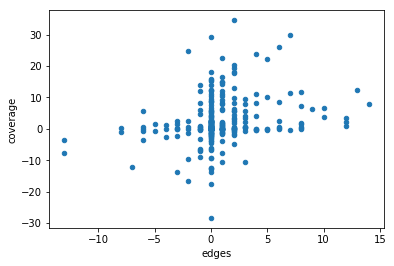

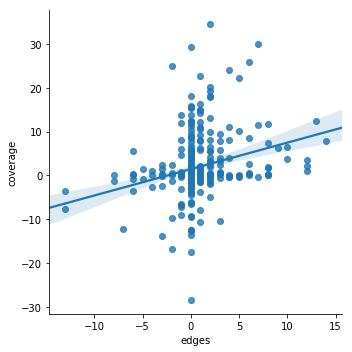

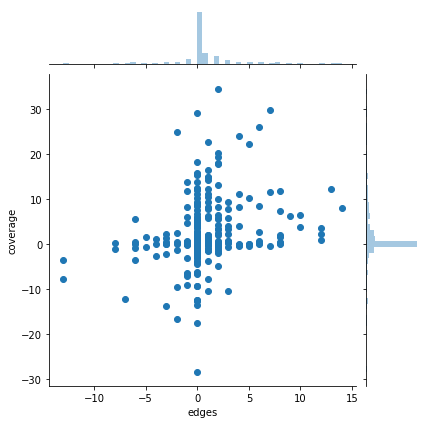

In [78]:
diff_result.plot.scatter(x='edges', y='coverage')
sns.lmplot(x='edges', y='coverage', data=diff_result, fit_reg=True)
sns.jointplot(x=diff_result.edges, y=diff_result.coverage, kind="scatter")

In [ ]:
diff_result.edges.describe().to_latex()

count    363.000000
mean       0.674931
std        2.946879
min      -13.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       14.000000
Name: edges, dtype: float64

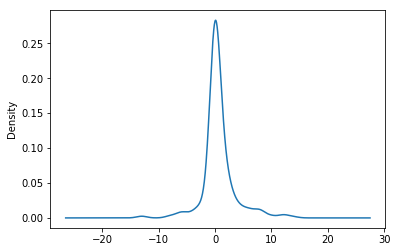

In [80]:
diff_result.edges.plot.kde()

In [55]:
random_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,0,0,51.219512
androidlab.carlog,1,0,0,0,0,17.230769
asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,6.605148
bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.797583


In [56]:
systematic_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,1,1,21.951220
androidlab.carlog,1,0,0,0,0,19.076923
asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,4.419621
bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.797583


In [57]:
# test = pd.DataFrame({'strategy': ["random", "random", "systematic", "systematic", "systematic", "random"],
#                      'app': ["app1", "app1", "app2", "app2", "app2", "app3"],
#                      'source': ["test", "train", "test", "train", "train", "train"],
#                      'target': ["test", "test", "test", "train", "hoi", "pop"]})

# t = test.groupby(['strategy', 'app']).stack()

number_of_unique_screens_per_app = valid_test_graph[['strategy', 'app', 'source', 'target']].melt(
    id_vars=['strategy', 'app'])

number_of_unique_screens_per_app.head()

,strategy,app,variable,value
0,systematic,com.advent.chat,source,com.advent.chat.MainActivity
1,random,com.advent.chat,source,com.advent.chat.MainActivity
2,systematic,com.smsrobot.periodlite,source,com.smsrobot.periodlite.SetupActivity
3,random,com.smsrobot.periodlite,source,com.smsrobot.periodlite.StartActivity
4,systematic,com.ikeyboard.theme.RoseSkull,source,com.qisi.plugin.activities.MainActivity


In [58]:
ran_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'random')].drop(['strategy'],
                                                                                                       axis=1)
sys_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'systematic')].drop(['strategy'],
                                                                                                           axis=1)


In [59]:
ran_n.groupby(['app']).value.nunique()

app
alex.map.maps                                        2
androidlab.carlog                                    1
asp.aniemo.pack6.ext                                 1
bestfreelivewallpapers.funny_photo_editor            1
bestfreelivewallpapers.love_photo_frames_hd          1
biz.andxor.hearingaid                                1
br.com.blackmountain.mylook                          3
br.com.gerenciadorfinanceiro.controller              5
br.org.altitudesl                                    1
brdata.cms.base.foodbazaar                           3
bth.studio.quickcharge                               8
carrioncastillo.invitaciones.happy                   4
church.itvessel.com.tarm                             1
co.appzone.www.eye_makeup                            1
co.instavr.iostest                                   1
co.mobius.vrcinema                                   2
coloring.book.color                                  1
com.BillDirkes.QuickEM                               2
com.Ca

In [60]:
sys_n.groupby(['app']).value.nunique()

app
alex.map.maps                                        2
androidlab.carlog                                    1
asp.aniemo.pack6.ext                                 1
bestfreelivewallpapers.funny_photo_editor            1
bestfreelivewallpapers.love_photo_frames_hd          1
biz.andxor.hearingaid                                1
br.com.blackmountain.mylook                          2
br.com.geochenapps.tonguetwister                     1
br.com.gerenciadorfinanceiro.controller              3
br.org.altitudesl                                    1
brdata.cms.base.foodbazaar                           4
bth.studio.quickcharge                               5
carrioncastillo.invitaciones.happy                   4
church.itvessel.com.tarm                             1
co.appzone.www.eye_makeup                            1
co.instavr.iostest                                   1
co.mobius.vrcinema                                   2
coloring.book.color                                  1
com.Bi

In [61]:
diff_in_unique_screens = ran_n.groupby(['app']).value.nunique() - sys_n.groupby(['app']).value.nunique()
diff_in_unique_screens.head()

app
alex.map.maps                                  0.0
androidlab.carlog                              0.0
asp.aniemo.pack6.ext                           0.0
bestfreelivewallpapers.funny_photo_editor      0.0
bestfreelivewallpapers.love_photo_frames_hd    0.0
Name: value, dtype: float64

In [82]:
diff_result = pd.concat([diff_in_unique_screens.to_frame("screens"), diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
diff_result.head()


,screens,coverage
app,,
alex.map.maps,0.0,29.268293
androidlab.carlog,0.0,-1.846154
asp.aniemo.pack6.ext,0.0,0.000000
bestfreelivewallpapers.funny_photo_editor,0.0,2.185527
bestfreelivewallpapers.love_photo_frames_hd,0.0,0.000000


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


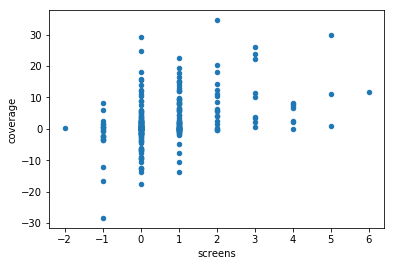

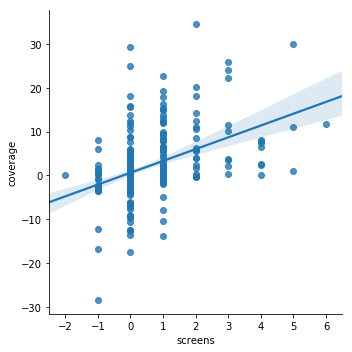

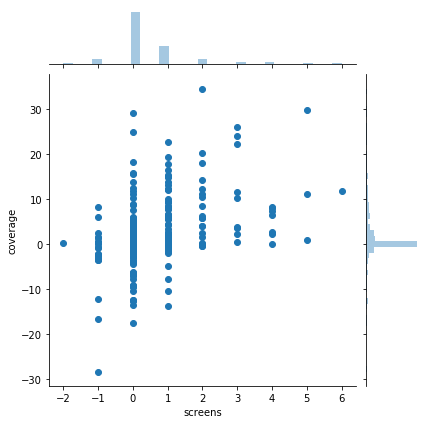

In [84]:
diff_result.plot.scatter(x='screens', y='coverage')
sns.lmplot(x='screens', y='coverage', data=diff_result, fit_reg=True)
sns.jointplot(x=diff_result.screens, y=diff_result.coverage, kind="scatter")

In [88]:
diff_result.screens.describe()

count    363.000000
mean       0.462810
std        1.054126
min       -2.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: screens, dtype: float64

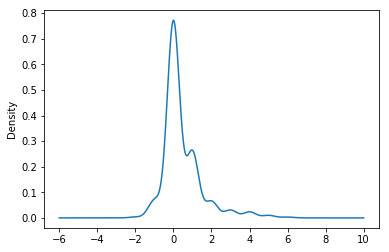

In [86]:
diff_result.screens.plot.kde()